In [1]:
from __future__ import division, print_function

# Third-party
import matplotlib as mpl
import matplotlib.pyplot as pl
import numpy as np
%matplotlib inline

# Custom
import biff

First, define a function to compute the density. In this case I'll use a flattened Hernquist profile. `M` is the mass, `a` the scale radius, and `q` the flattening:

In [2]:
def flattened_hernquist_density(x, y, z, M, a, q):
    s = np.sqrt(x*x + y*y + z*z/(q*q))
    return M*a / (2*np.pi) / (s * (a + s)**3)

Next I'll define the grid of `nlm` values to compute coefficients for. Because it's axisymmetric, we can ignore $m > 0$ terms and odd $l$ terms:

In [3]:
nmax = 8
lmax = 8

For this example, I'll just set $M=1$, $a=1$, $q=0.9$.

Setting `skip_odd=True` skips all odd angular terms like `l=1,3,5...` and setting `skip_m=True` skips all terms with `m>0`

In [4]:
M = 1.
a = 1.
q = 0.9

(S,Serr),(T,Terr) = biff.compute_coeffs(flattened_hernquist_density,
                                        nmax=nmax, lmax=lmax, 
                                        skip_odd=True, skip_m=True,
                                        M=M, r_s=a,
                                        args=(M,a,q))

In [12]:
S.shape

(9, 9, 9)

All sin coefficients should be 0:

In [11]:
assert np.allclose(T, 0.)

Make a grid of n,l to use as coordinates:

In [13]:
nl = np.meshgrid(np.arange(0,nmax+1,1),
                 np.arange(0,lmax+1,1))

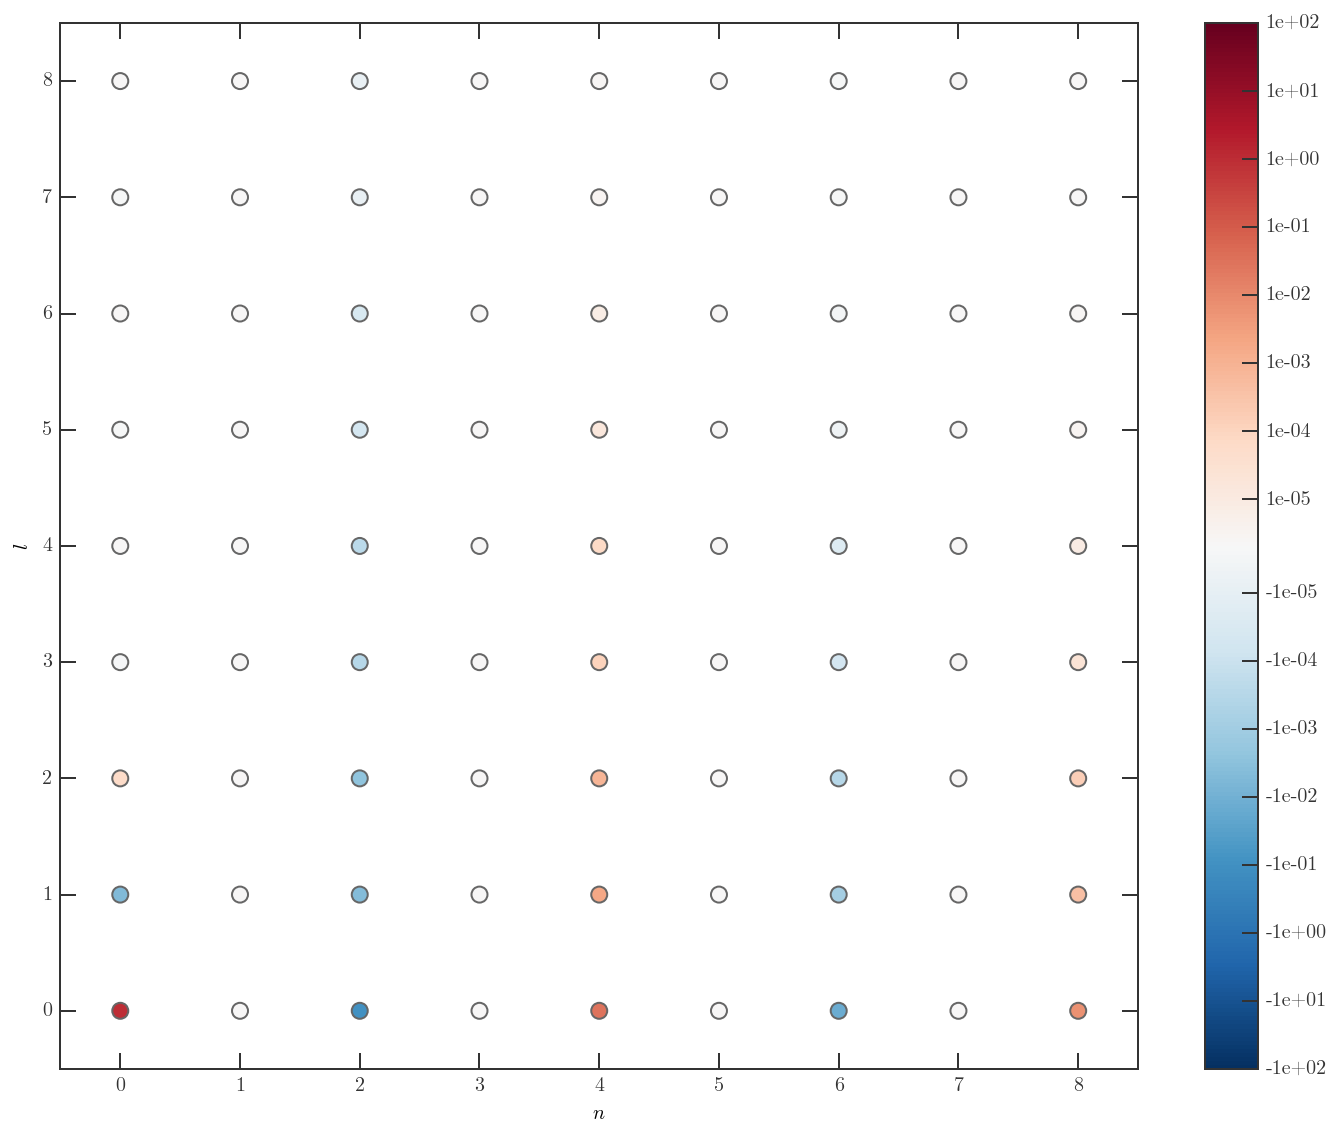

In [14]:
# coefficients
fig,ax = pl.subplots(1,1,figsize=(10,8))

c = ax.scatter(nl[0].ravel(), nl[1].ravel(), c=S[:,:,0].ravel(), s=64,
               norm=mpl.colors.SymLogNorm(1E-5), cmap='RdBu_r',
               vmin=-100, vmax=100, linewidths=1., edgecolors='#666666')

ax.xaxis.set_ticks(np.arange(0,nmax+1,1))
ax.yaxis.set_ticks(np.arange(0,lmax+1,1))

ax.set_xlim(-0.5, nmax+0.5)
ax.set_ylim(-0.5, lmax+0.5)

ax.set_xlabel('$n$')
ax.set_ylabel('$l$')

tickloc = np.concatenate((-10.**np.arange(2,-5-1,-1),
                          10.**np.arange(-5,2+1,1)))
fig.colorbar(c, ticks=tickloc, format='%.0e')
fig.tight_layout()